<a href="https://colab.research.google.com/github/CepbluKot/ecology_ml/blob/main/ecology_ml_w_data_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data.csv')
df=df.drop(['X','Y','ObjectID','code', 'area', 'ID', 'texture', 'parentrock', 'relief', 'soil_name', 'Al ммоль-экв/100г'], axis=1)
df.head(5)

,pHH20,pHKCl,Гумус %,P мг/кг,K мг/кг,Mn мг/кг,Co мг/кг,Cu мг/кг,Zn мг/кг,Mo мг/кг,B мг/кг,Ca ммоль-экв/100г,Mg ммоль-экв/100г,N_NH4 мг/кг,N_NO3 мг/кг,Z,NDVI
0,5.8,5.0,6.5,81.1,178.3,24.1,0.04,0.06,0.21,0.0,2.2,13.7,2.7,8.9,40.8,1.706668,0.727741
1,5.9,5.1,6.2,262.9,328.8,29.0,0.04,0.07,0.18,0.0,2.6,14.3,2.6,12.1,43.4,1.811376,0.658671
2,5.7,4.9,7.4,202.3,255.5,27.9,0.04,0.10,0.25,0.0,2.1,12.5,2.5,9.0,24.3,1.891337,0.768856
3,5.9,5.0,7.2,66.7,136.8,15.1,0.03,0.10,0.37,0.0,2.3,14.4,2.7,9.1,21.8,1.919135,0.722283
4,5.7,5.0,6.7,68.0,210.7,22.9,0.04,0.06,0.22,0.0,2.0,12.5,2.3,8.2,24.1,1.609458,0.700665


<AxesSubplot: >

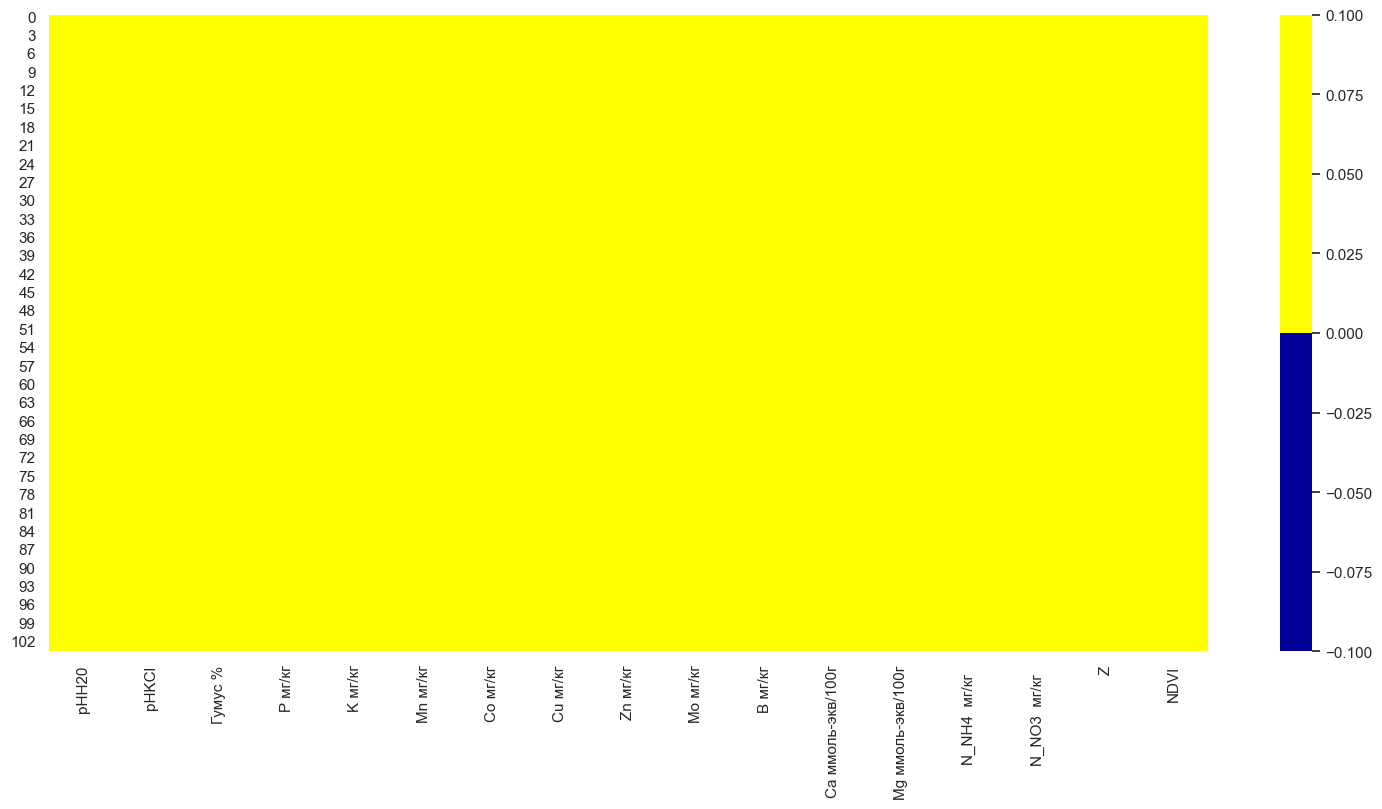

In [225]:
colours = ['#000099', '#ffff00'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [226]:
X=df.drop('NDVI',axis=1)
y=df['NDVI']

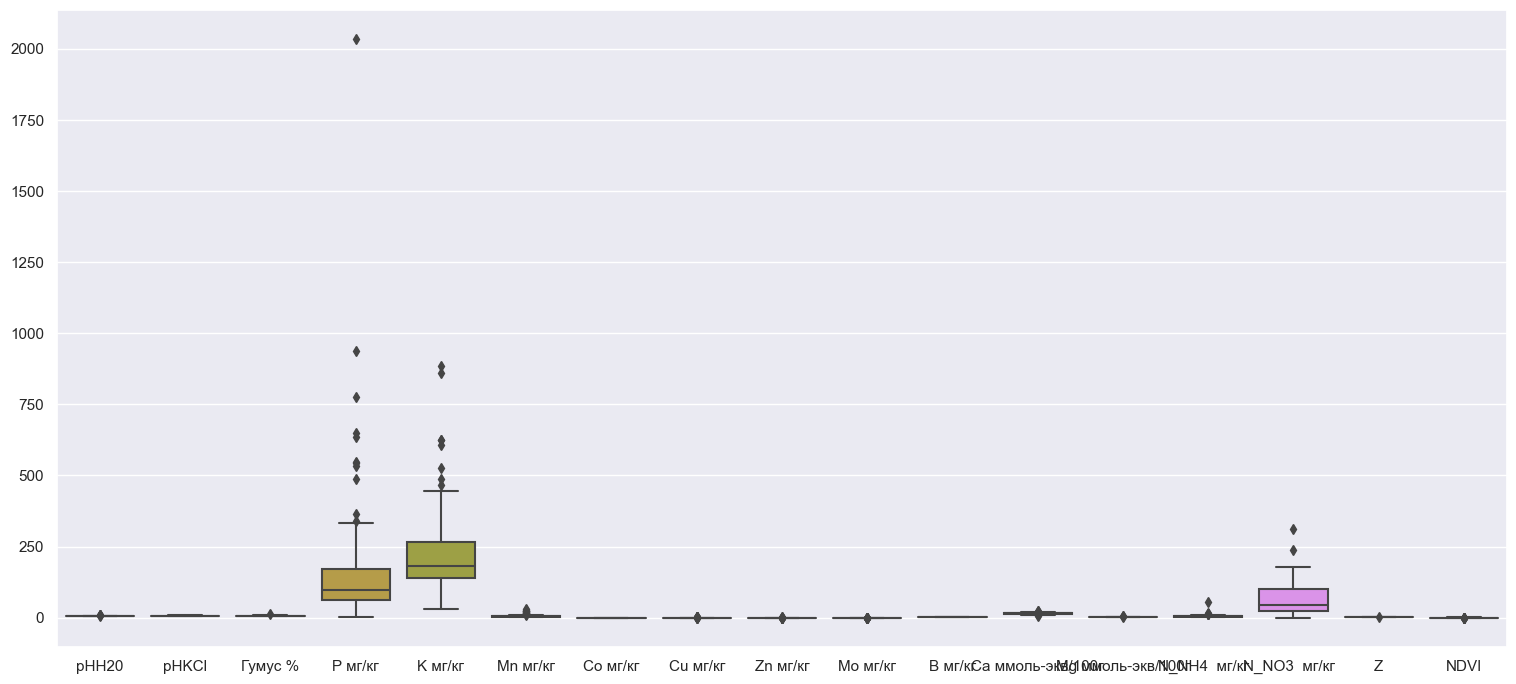

In [227]:
import seaborn as sns


sns.set(rc={'figure.figsize':(18.7,8.27)})
ax = sns.boxplot(df)  

In [228]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import IsolationForest

#идентифицирование выбросов
iso = IsolationForest()
y_outliers = iso.fit_predict(df)
#отбрасывание строк с выбросами
for i in range(len(y_outliers)):
    if y_outliers[i] == -1:
        df.drop(i, inplace = True)

(98, 17)


<AxesSubplot: >

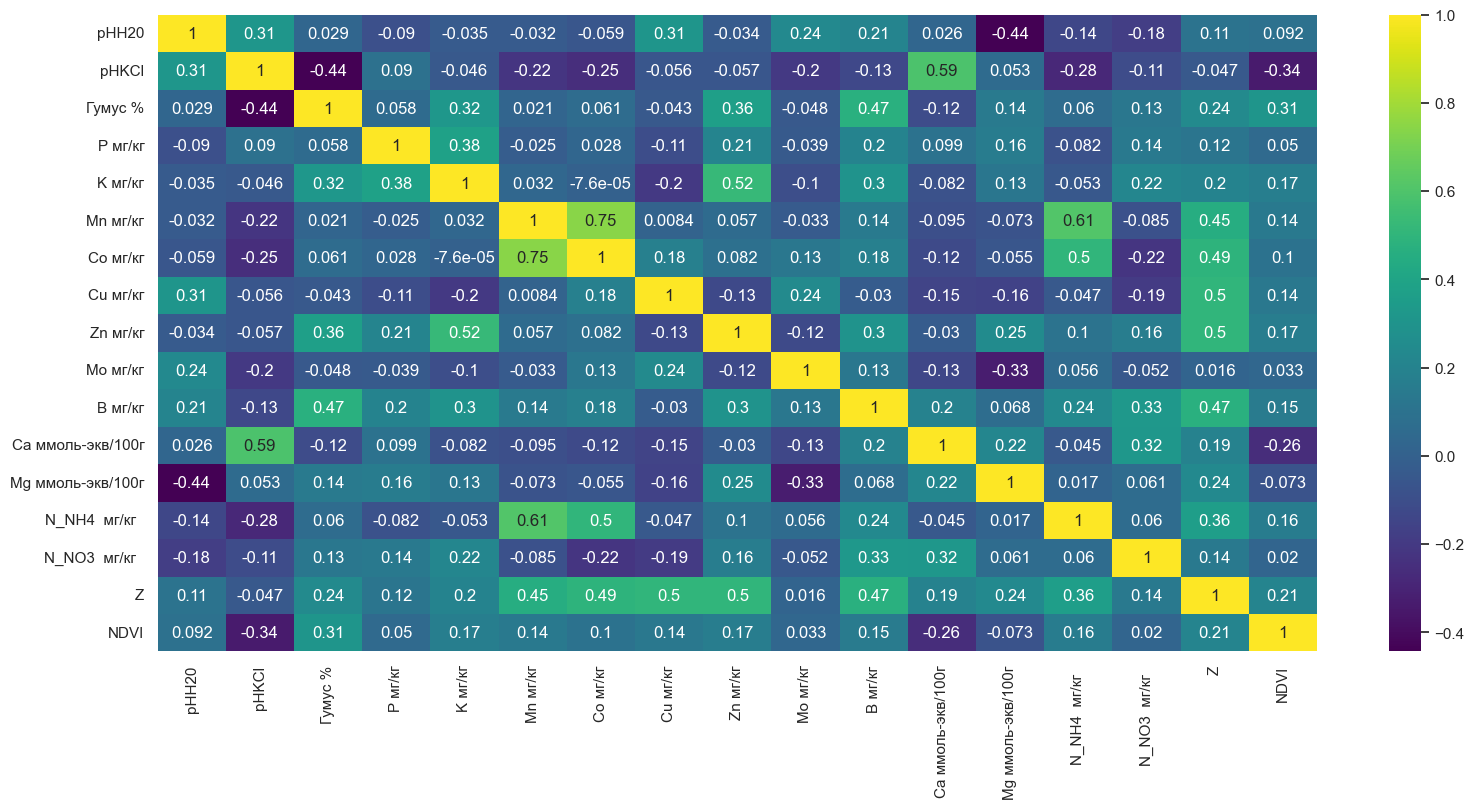

In [229]:
sns.heatmap(df.corr(),  cmap = 'viridis',annot = True)

In [230]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [231]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# X_train, X_test, y_train, y_test = train_test_split(X_norm, y,random_state=0)


best_parameters_selector = SelectKBest(score_func=f_regression, k=9)

selected_parameters_data = best_parameters_selector.fit_transform(X_norm, y)

filter = best_parameters_selector.get_support()
features = X.columns


print(features.values[filter])

['pHKCl' 'Гумус %' 'K мг/кг' 'Mn мг/кг' 'Cu мг/кг' 'Zn мг/кг' 'B мг/кг'
 'Ca ммоль-экв/100г' 'Z']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'pHH20'),
  Text(1, 0, 'pHKCl'),
  Text(2, 0, 'Гумус %'),
  Text(3, 0, 'P мг/кг'),
  Text(4, 0, 'K мг/кг'),
  Text(5, 0, 'Mn мг/кг'),
  Text(6, 0, 'Co мг/кг'),
  Text(7, 0, 'Cu мг/кг'),
  Text(8, 0, 'Zn мг/кг'),
  Text(9, 0, 'Mo мг/кг'),
  Text(10, 0, 'B мг/кг'),
  Text(11, 0, 'Ca ммоль-экв/100г'),
  Text(12, 0, 'Mg ммоль-экв/100г'),
  Text(13, 0, 'N_NH4  мг/кг  '),
  Text(14, 0, 'N_NO3  мг/кг  '),
  Text(15, 0, 'Z')])

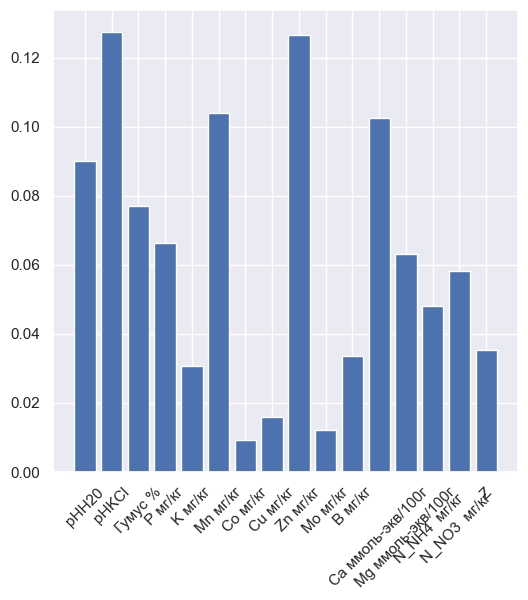

In [232]:
from sklearn.ensemble import RandomForestRegressor


regr = RandomForestRegressor()
regr.fit(X_norm, y)
plt.figure(figsize=(6,6))
plt.bar(X.columns, regr.feature_importances_)
plt.xticks(rotation=45)

In [233]:
from sklearn.feature_selection import RFE


rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=9)
rfe_res = rfe.fit_transform(X_norm, y)


filter = rfe.get_support()
features = X.columns

print(features.values[filter])

['pHH20' 'pHKCl' 'Гумус %' 'P мг/кг' 'Mn мг/кг' 'Zn мг/кг'
 'Ca ммоль-экв/100г' 'Mg ммоль-экв/100г' 'N_NO3  мг/кг  ']


In [234]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [235]:
X=df.drop('NDVI',axis=1)
Y=df['NDVI']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.20, shuffle = True)

In [236]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, Y_train)				#Обучаем модель
Y_LR = LR.predict(X_test)				#Предсказываем значения для выборки    

print('fakescore', LR.score(X_train, Y_train))


print ('MAE:', round (mean_absolute_error(Y_test, Y_LR),3))		#Метрики
print ('√MSE:', round (mean_squared_error(Y_test, Y_LR)**(1/2),3))
print ('R2_score:', round (r2_score(Y_test, Y_LR),3))

fakescore 0.2549855068718483
MAE: 0.107
√MSE: 0.136
R2_score: -0.202


делаем вывод, что модель типа DecisionTreeRegressor не подходит тк пропорциональное ее размеру увеличивается ошибка